# [Phystech@DataScience](https://thetahat.ru/courses/ph-ds-2025-spr)
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  15 баллов
* Задача 2 &mdash;  20 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  20 баллов

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 4 &mdash;  20 баллов
* Задача 5 &mdash; 25 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 6 &mdash; 30 баллов
-----

In [ ]:
# Bot check

# HW_ID: phds_hw7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [71]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import gamma, loggamma

sns.set_style("whitegrid")

%matplotlib inline

In [72]:
from matplotlib.pyplot import Line2D

# Теоретическая часть

## <b><font color="blue">Легкая часть</font></b>

### Задача 1

Найдите оценку параметра $\theta$ методом максимального правдоподобия по выборке размера $n$ из распределения:

1. Для $\mathcal{N}(a,\sigma^2)$ найдите ОМП в следующих случаях:
    <br>a. $\theta = (a, \sigma^2)$
    <br>b. $\theta = \sigma^2$, если $a$ известно
    <br>c. $\theta = a$, если $\sigma^2$ известно (для этого случая посчитайте также асимптотическую дисперсию оценки по теореме из лекции)
     

2. $\mathrm{Pois}(\theta)$. Посчитайте асимптотическую дисперсию, если оценка является асимптотически нормальной по теореме из лекции.

1. a)
Для $\mathcal{N}(a, \sigma^2)$:
\begin{equation*}
\ln \mathcal{L}(a, \sigma^2) = -\frac{n}{2}\ln 2\pi - \frac{n}{2}\ln \sigma^2 -\frac{1}{2\sigma^2}\displaystyle\sum_{i=1}^{n}(X_i - a)^2.
\end{equation*}

\begin{equation*}
\frac{\partial \ln \mathcal{L}(\hat{a}, \sigma^2)}{\partial a} = \frac{1}{\sigma^2}\displaystyle\sum_{i=1}^{n}(X_i - \hat{a}) = 0, 
\end{equation*}
откуда $\hat{a} =  \frac{1}{n}\displaystyle\sum_{i=1}^{n}X_i = \overline{X}$.
Аналогично
\begin{equation*}
\frac{\partial \ln \mathcal{L}(\hat{a}, \hat{\sigma}^2)}{\partial \sigma^2} = -\frac{n}{2\hat{\sigma}^2} + \frac{1}{2\hat{\sigma}^2}\displaystyle\sum_{i=1}^{n}(X_i - \hat{a})^2 = 0,
\end{equation*}
откуда $\hat{\sigma}^2 = \frac{1}{n}\displaystyle\sum_{i=1}^{n}(X_i - \overline{X})^2$.




b) Если $a$ известно, то:
\begin{equation*}
\ln \mathcal{L}(\sigma^2) = -\frac{n}{2}\ln 2\pi - \frac{n}{2}\ln \sigma^2 -\frac{1}{2\sigma^2}\displaystyle\sum_{i=1}^{n}(X_i - a)^2,
\end{equation*}
значит 
\begin{equation*}
\frac{\partial \ln \mathcal{L}(\hat{\sigma}^2)}{\partial \sigma^2} = -\frac{n}{2\hat{\sigma}^2} + \frac{1}{2\hat{\sigma}^2}\displaystyle\sum_{i=1}^{n}(X_i - a)^2 = 0,
\end{equation*}
то есть $\hat{\sigma}^2 = \frac{1}{n}\displaystyle\sum_{i=1}^{n}(X_i - a)^2$.




c) Из пункта a) следует, что $\hat{a} = \overline{X}$. Найдём асимптотическую дисперсию оценки $\hat{a} = \overline{X}$. По ЦПТ
\begin{equation*}
\sqrt{n}\Big(\overline{X} - \mathbb{E}[X_1]\Big) \xrightarrow{\text{d}} \mathcal{N}(0, \mathbb{D}[X_1]),
\end{equation*}
$\mathbb{E}[X_1] = a, \mathbb{D}[X_1] = \sigma^2$, тогда $\hat{a} = \overline{X}$ - асимптотически нормальная оценка для $\theta = a$ с асимптотической дисперсией $\sigma^2(\theta) = \sigma^2$.

2. Для $Pois(\theta)$ 
\begin{equation*}
\ln \mathcal{L}(\theta) = (\displaystyle\sum_{i=1}^{n}X_i)\ln \theta -n\theta - \displaystyle\sum_{i=1}^{n}\ln (X_i !),
\end{equation*}

\begin{equation*}
\frac{d\mathcal{L}(\hat{\theta})}{d\theta} = \frac{\displaystyle\sum_{i=1}^{n}X_i}{\hat{\theta}} - n = 0,
\end{equation*}
то есть ОМП $\hat{\theta} = \frac{1}{n}\displaystyle\sum_{i=1}^{n}X_i = \overline{X} $. По ЦПТ
\begin{equation*}
\sqrt{n}\Big(\overline{X} - \mathbb{E}[X_1]\Big) \xrightarrow{\text{d}} \mathcal{N}(0, \mathbb{D}[X_1]),
\end{equation*}
где $\mathbb{E}[X_1] = \theta$, $\mathbb{D}[X_1] = \theta$, значит по определению АНО, $\hat{\theta} = \overline{X}$ - АНО для $\theta$ с асимптотической дисперсией $\sigma^2(\theta) = \theta$.

### Задача 2.

Пусть $X_1,...,X_n$ выборка из из распределения $U(0, \theta)$.

1. Проверьте, является ли оценка $2\overline{X}$ состоятельной, сильно состоятельной и асимптотически нормальной.

2. Постройте асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$.

1. $\mathbb{E}[X_k] = \frac{\theta}{2}, \forall k = 1, ..., n$. По усиленному закону больших чисел
\begin{equation*}
\overline{X}  \xrightarrow{\text{п.н.}} \frac{\theta}{2}, 
\end{equation*}
значит $2\overline{X}  \xrightarrow{\text{п.н.}} \theta$, значит $2\overline{X}$ - сильно состоятельная оценка $\theta$ Раз оценка $2\overline{X}$ - сильно состоятельная, то она состоятельная. Проверим её на асимптотическую нормальность. По ЦПТ:
\begin{equation*}
\sqrt{n}\Big(\overline{X} - \mathbb{E}[X_1]\Big) \xrightarrow{\text{d}} \mathcal{N}(0, \mathbb{D}[X_1]),
\end{equation*}
где $\mathbb{E}[X_1] = \frac{\theta}{2}$, $\mathbb{D}[X_1] = \frac{\theta^2}{12}$. Значит, $\overline{X}$ - асимптотически нормальная оценка для $\frac{\theta}{2}$ с асимптотической дисперсией $\sigma^2(\theta) = \frac{\theta^2}{12}$. 

Рассмотрим функцию $\tau(x) = 2x$ - непрерывно дифференцируемую на $\mathbb{R}$. Значит, $2\overline{X}$ по теореме из лекции - АНО для $2 \cdot \frac{\theta}{2}$ с асимптотической дисперсией $(\sigma')^2(\theta) = \frac{\partial \tau}{\partial x}(\overline{X}) \cdot \sigma^2(\theta) \cdot \frac{\partial \tau}{\partial x}(\overline{X}) = 2 \cdot \frac{\theta^2}{12} \cdot 2 = \frac{\theta^2}{3}$. Значит, оценка  $2\overline{X}$ - сильно состоятельная (а значит и состоятельная) и асимптотически нормальная оценка параметра $\theta$.

2. Из первого пункта следует, что
\begin{equation*}
\sqrt{n}\Big(\frac{2\overline{X} - \theta}{\sqrt{\frac{\theta^2}{3}}}\Big)  \xrightarrow{\text{d}} \mathcal{N}(0,1).
\end{equation*}
Для асимптотического доверительного интервала

\begin{equation*}
\mathbb{P}\Big(Z_{\frac{1-\alpha}{2}} \leq \sqrt{3n}\frac{2\overline{X} - \theta}{\theta} \leq Z_{\frac{1+\alpha}{2}}\Big)\xrightarrow{\text{}} \alpha.
\end{equation*}
Из симметрии
\begin{equation*}
Z_{\frac{1-\alpha}{2}} = -Z_{\frac{1+\alpha}{2}}.
\end{equation*}

\begin{equation*}
-Z_{\frac{1+\alpha}{2}} \leq \sqrt{3n}\frac{2\overline{X} - \theta}{\theta} \leq Z_{\frac{1-\alpha}{2}}, 
\end{equation*}
откуда 
\begin{equation*}
-\frac{1}{\sqrt{3n}} Z_{\frac{1+\alpha}{2}} + 1 \leq \frac{2\overline{X}}{\theta} \leq \frac{1}{\sqrt{3n}} Z_{\frac{1+\alpha}{2}} + 1.
\end{equation*}
Тогда искомый интервал имеет вид 
\begin{equation*}
2\overline{X}\Big(1 - \frac{1}{\sqrt{3n}} Z_{\frac{1+\alpha}{2}}\Big) \leq \theta \leq 2\overline{X}\Big(1 + \frac{1}{\sqrt{3n}} Z_{\frac{1+\alpha}{2}}\Big).
\end{equation*}

## <b><font color="orange">Сложная часть</font></b>

### Задача 3.
Пусть $X_1,...,X_n$ &mdash; выборка из распределения Коши с параметром сдвига $\theta$.


1. Найдите оценку максимального правдоподобия параметра $\theta$ для $n=1$ и $n=2$.
2. Найдите асимптотическую дисперсию, которую может обещать теорема о свойствах ОМП. Что мешает применить эту теорему? Сравните с дисперсией, которая была получена для выборочной медианы.


1. Сначала рассмотрим случай $n=1$. В этом случае функция правдоподобия имеет вид
\begin{equation*}
\mathcal{L}(\theta) = \frac{1}{\pi (1 + (X_1-\theta)^2)}.
\end{equation*}
Тогда для минимизации $\mathcal{L}(\theta)$ достаточно максимизировать знаменатель. Максимум знаменателя достигается при $\hat{\theta}$ = X_1 - это и есть ОМП в случае $n=1$.


Теперь рассмотрим случай $n=2$. В этом случае 
\begin{equation*}
\mathcal{L}(\theta) = \frac{1}{\pi^2 (1 + (X_1-\theta)^2) \cdot (1 + (X_2-\theta)^2)},
\end{equation*}

\begin{equation*}
\ln \mathcal{L}(\theta) = -2\ln \pi - \ln (1 + (X_1-\theta)^2) -\ln (1 + (X_2-\theta)^2) = -2\ln \pi - \varphi(\theta),
\end{equation*}
где  $\varphi(\theta) = \ln (1 + (X_1-\theta)^2) +\ln (1 + (X_2-\theta)^2)$. Минимизация $\ln \mathcal{L}(\theta)$, а значит, и $\mathcal{L}(\theta)$, соответствуется минимизации $\varphi(\theta)$. 
\begin{equation*}
\frac{d\varphi(\theta)}{d\theta} = \frac{2(\theta-X_1)}{1 + (X_1-\theta)^2} +  \frac{2(\theta-X_2)}{1 + (X_2-\theta)^2} = 0.
\end{equation*}
Полученное уравнение не имеет аналитического решения.


2. Из лекции: $\hat{\mu}$ - выборочная медиана - АНО для $\theta$ с выборочной дисперсией $\frac{\pi^2}{4}$. Теорема о свойствах ОМП не применима, так как для распределение Коши уравнение правдоподобия имеет не единственное решение.

# Практическая часть

## <b><font color="blue">Легкая часть</font></b>

### Задача 4

**1.** Загрузите с помощью `pandas`:
-  **Профиль Биология** &mdash; данные из файла `Data_Cortex_Nuclear_quantile.csv` экспрессии белков у белых мышей и оставьте следующие белки для анализа:`pCAMKII_N`, `pELK_N`, `ARC_N`

- **Профиль Физика** &mdash;  [данные](https://www.kaggle.com/datasets/purushottamnawale/materials?resource=download) о материалах и их механических свойствах и оставьте для анализа следующие столбцы: `A5`, `Su`, `E`

In [16]:
data = pd.read_csv(r"C:\Users\maksa\OneDrive\Документы\Data Science\Data (1).csv")
data = data[['A5', 'Su', 'E']]
data.head()

,A5,Su,E
0,39.0,421,207000
1,37.0,424,207000
2,37.0,386,207000
3,36.0,448,207000
4,35.8,441,207000


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [17]:
num_features = data.select_dtypes(['int64', 'float64']).columns
stats = data[num_features].describe().round(2)

stats

,A5,Su,E
count,1346.00,1552.00,1552.00
mean,19.33,572.75,164571.52
std,12.42,326.83,56135.41
min,0.50,69.00,73000.00
25%,11.00,340.00,105000.00
50%,16.00,500.00,206000.00
75%,24.38,705.00,206000.00
max,70.00,2220.00,219000.00


**2.** Подсчет выборочных квантилей

Для посчета выборочных квантилей в библиотеке `numpy` есть функция `numpy.quantile`. На вход ей передается исследуемый массив и значение квантиля.

Посчитайте с помощью этой функции выборочную медиану для признака `pCAMKII_N` из датасета для биологов и `A5` из датасета для физиков

In [18]:
print(np.quantile(data['A5'], q=0.5))

nan


Функция должна вернуть `nan`. Проверьте столбец на наличие пропусков, выведите их количество

In [20]:
print(data['A5'].isnull().sum())

206


Получите значение выборочной медианы, удалив пропуски

In [24]:
print(np.quantile(data['A5'].dropna(), q=0.5))

16.0


Для работы с пропущенными значениями в `numpy` есть специальная функция `numpy.nanquantile`

Посчитайте значение выборочной медианы с использованием этой функции (пропуски не удаляйте) и сравните ответы

In [25]:
print(np.nanquantile(data['A5'], q=0.5))

16.0


Значения выборочной медианы, подсчитанные двумя способами, совпали.

**3.** Визуализация квантилей и изучение boxplot

Допишите функцию для совместной визуализации `boxplot` и гистограммы с нанесенными на нее квантилями

In [35]:
def draw_quintiles(data, alphas, ymax=0.4):
    '''
    data: pd.Series - столбец из рассматриваемого признака
    alphas: list[float] - массив из значений интересуемых квантилей, которые будут отрисованы
    ymax: float - максимальное значение для вертикальных линий на гистограмме
    '''

    title = data.name
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(14, 8))
    f.suptitle(f"Распределение {title}")

    sns.boxplot(x=data, ax=ax_box, color='blue')

    for alpha in alphas:
        nearest = np.quantile(data, alpha)
        ax_hist.vlines(nearest, 0, ymax, color="red", label=f'{alpha} квантиль')
    sns.histplot(data=data, kde=True, ax=ax_hist, stat='density')

    plt.legend()
    plt.show()

Какие квантили соответствуют границам "ящика с усами"? Допишите их и нарисуйте графики для разных признаков

In [36]:
alphas = [0.25, 0.5, 0.75]

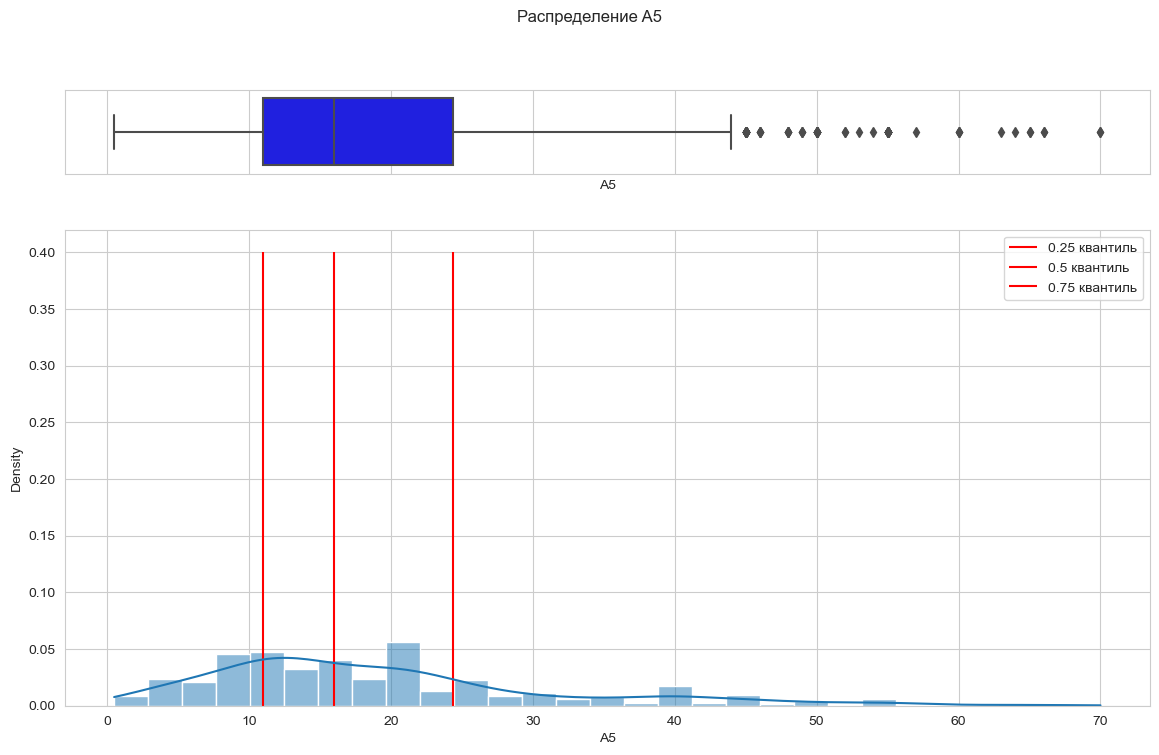

In [37]:
draw_quintiles(data['A5'].dropna(), alphas)

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** boxplot ограничен квантилями 1/4 и 3/4, а внутри себя содержит квантиль 1/2 (медиану). Кроме того у него есть "усы", расположенные на расстоянии 1.5IQR от границ ящик, где IQR - межквантильный размах. Считаем данные выбросами, если они расположены за "усами". В данном случае слева от ящика выбросов нет, а справа есть незначительное количество.

Постройте гистограммы для каждой выборки, отметьте на них положение среднего и медианы. Объясните причины полученных расхождений (в случае их наличия)

In [40]:
def plot_hist(data):
    """
    Строит гистограмму распределения данных с линией KDE,
    а также вертикальными линиями, обозначающими медиану и среднее значение.

    Параметры:
    ----------
    data :pd.Series
        Массив числовых данных, для которых строится гистограмма.
    """

    plt.figure(figsize=(14,7))
    sns.histplot(data ,kde=True)

    median_value = np.quantile(data, 0.5)
    mean_value = np.mean(data)

    plt.vlines(median_value, 0, 120, color='red',label=r'$\hat{\mu}$')
    plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
    plt.legend()
    plt.show();

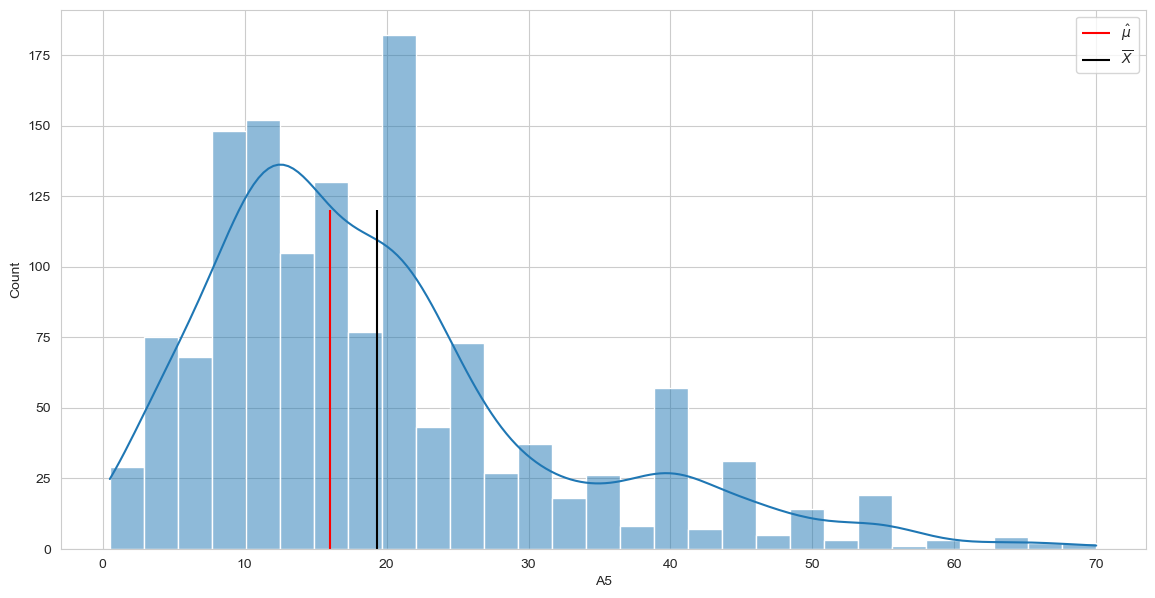

In [41]:
plot_hist(data['A5'].dropna())

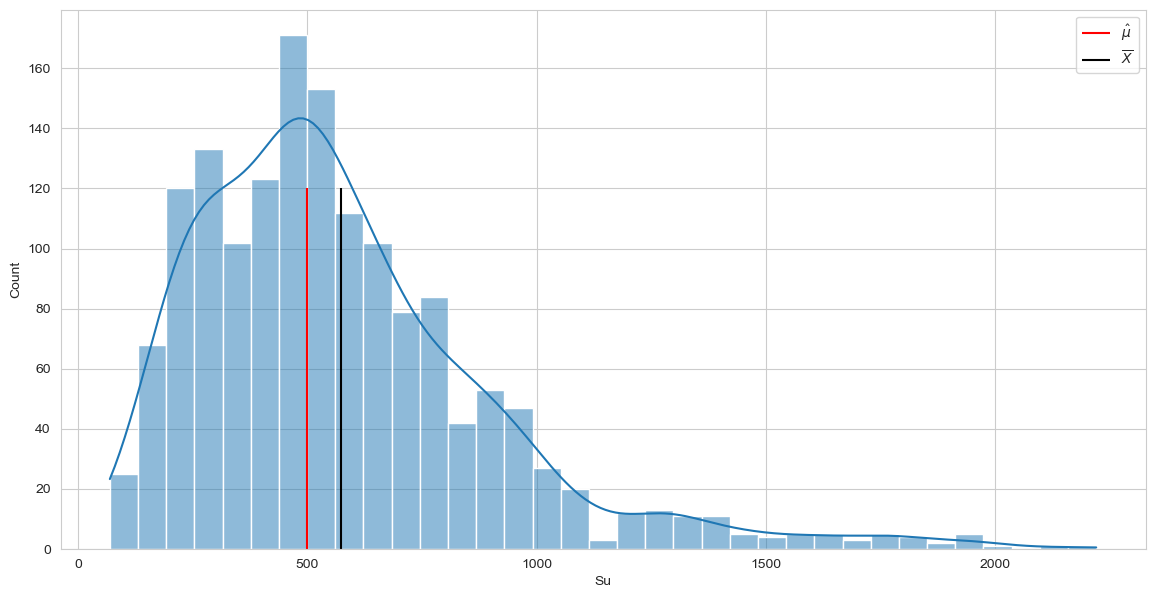

In [42]:
plot_hist(data['Su'].dropna())

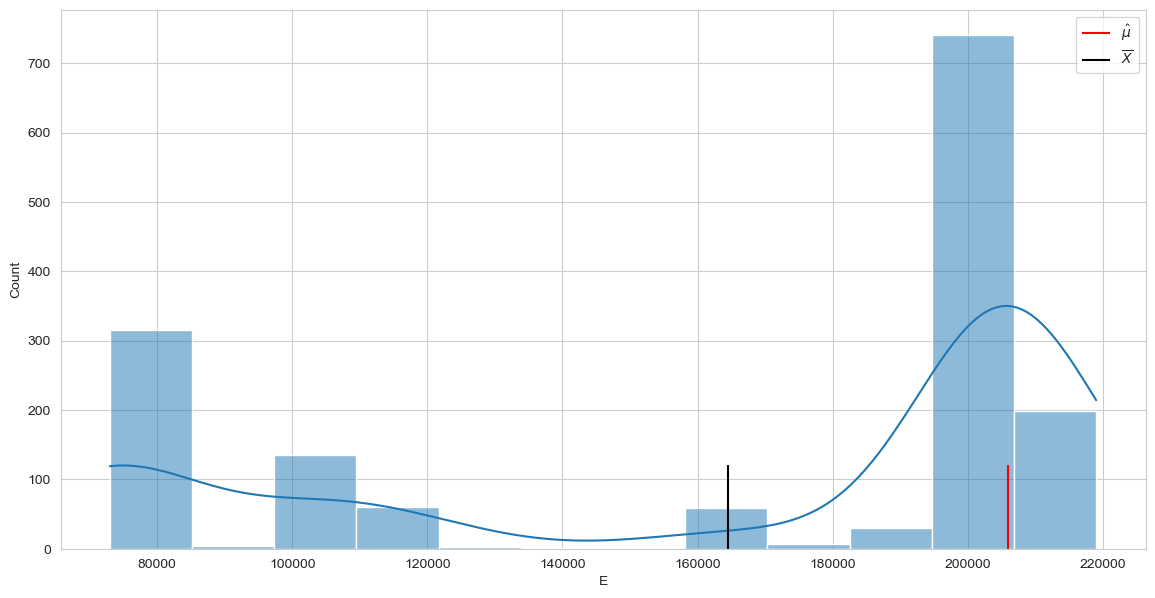

In [45]:
plot_hist(data['E'].dropna())

**Ответ:** На всех трёх графиках медиана близка к тем значениям, которые чаще всего встречаются (к наиболее высоким столбцам гистограммы), тогда как среднее сильно чувствительно к выбросам и смещается в их сторону, значит, в случае наличие большого числа выбросов медиана лучше характеризует выборку.

**4.**  Устранение выбросов

Межквантильным размахом `IQR` называется расстояние между первым и третим выборочным квартилем. Выбросами же принято счиать наблюдения которые находятся за пределами первого или же третьего выборочного квантиля на расстоянии более $1.5  \times \text{IQR}$.
Выберете признак с наиболее характерными выбросами, удалите их.

In [47]:
def count_emissions(data):
    data = data.dropna()
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    up = Q3 + 1.5*IQR
    emissions = data[(data < low)|(data > up)]
    return len(emissions)

In [48]:
for column in data.columns:
    print(f'Выбросы в {column}: {count_emissions(data[column])}')

Выбросы в A5: 83
Выбросы в Su: 73
Выбросы в E: 0


Видим, что больше все выбросов для признака A5.

In [49]:
Q1 = np.quantile(data['A5'].dropna(), 0.25)
Q3 = np.quantile(data['A5'].dropna(), 0.75)
IQR = Q3 - Q1
no_outliers = data['A5'][(data['A5'] >= Q1-1.5*IQR) & (data['A5'] <= Q3+1.5*IQR)]

Выведите гистограмму обработанной выборки и отметьте на нем положения среднего и медианы

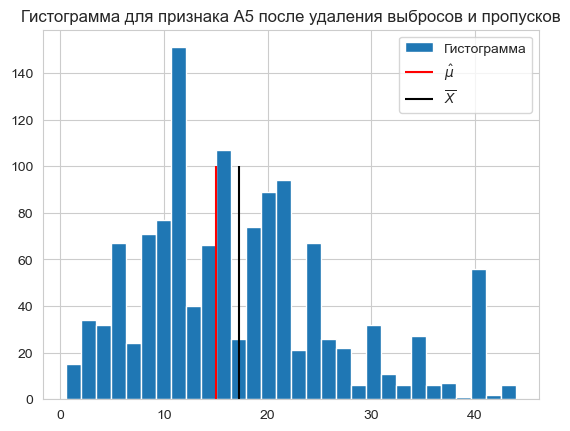

In [55]:
plt.hist(no_outliers, bins=30, label="Гистограмма")
median= np.quantile(no_outliers, q=0.5)
mean = np.mean(no_outliers)
plt.title("Гистограмма для признака А5 после удаления выбросов и пропусков")
plt.vlines(median, 0, 100, color='red',label=r'$\hat{\mu}$')
plt.vlines(mean, 0, 100, color='black',label=r'$\overline{X}$')
plt.legend()

In [56]:
print(f'Медиана: {median}')
print(f'Среднее: {mean}')

Медиана: 15.0
Среднее: 17.228345209817896


А теперь постройте график на неотфильтрованный данных (как в предыдущем пункте). Для наглядности сравнения поставьте соответствующие границы для оси Ox.

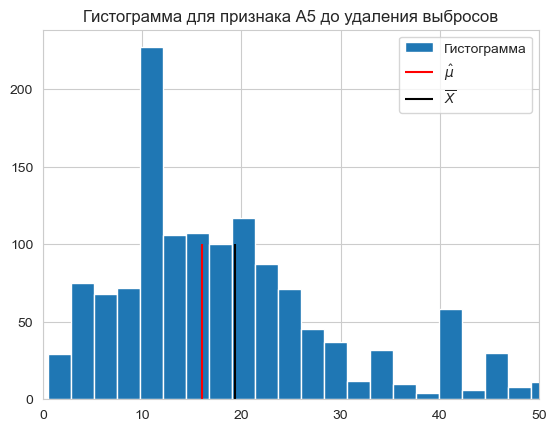

In [60]:
plt.hist(data['A5'].dropna(), bins=30, label="Гистограмма")
median= np.quantile(data['A5'].dropna(), q=0.5)
mean = np.mean(data['A5'].dropna())
plt.title("Гистограмма для признака А5 до удаления выбросов")
plt.vlines(median, 0, 100, color='red',label=r'$\hat{\mu}$')
plt.vlines(mean, 0, 100, color='black',label=r'$\overline{X}$')
plt.xlim((0, 50))
plt.legend()

In [59]:
print(f'Медиана: {median}')
print(f'Среднее: {mean}')

Медиана: 16.0
Среднее: 19.329420505200595


Объясните изменение положения оценок

**Ответ:** Медиана более устойчива к выбросам и меняется при их удалении не так сильно, тогда как среднее - чувствительно к выбросам, и при их удалении несколько ближе к медиане.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** Из одного только вида гистограммы никак нельзя сказать, выполнено ли свойство независимости наблюдений (случайных величин).

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие есть количественные меры зависимости между признаками?

**Ответ:** Как правило в задачах статистики мы вынуждены предполагать, что наблюдения независимы для использования всей нашей теории при анализе данных. Если свойство независимости нарушается, то значительная часть результатов (полученных оценок параметров распределения, каких-то общих выводах о данных) может оказаться неверной. Проверить независимость можно, например, вычислив ковариационную матрицу.

Сделайте выводы о полезности робастных статистик (устойчивых к выбросам), методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:** Робастные статистики полезны тем, что в каком-то смысле лучше характеризуют выборку, определяются лишь основным массивом данных, а не выбросами. Методы визуального анализа помогают проиллюстрировать это свойство робастных статистик, но не позволяют сказать что-либо о независимости наблюдений в нашей выборке. Хотя, конечно, модель независимых одинаково распределенных случайных величин суть абстракция, редко реализуемая в реальном мире, чем лучше она реализуется, тем лучше работают рассматриваемые статистические методы анализа данных.

### Задача 5

Асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки.
В этой задаче вам предстоит иллюстрировать этот факт, посчитав реальный уровень доверия для интервалов.

**Реальный уровень доверия (оценка доли покрытия интервалом)**  - доля случаев попадания истинного значения параметра в доверительный интервал.

*Пример:* вы проводите 100 экспериментов (создаете 100 выборок), для каждой выборки рассчитываете АДИ для параметра $\theta$. Истинный параметр попадает в 93 интервала из 100, значит реальный уровень доверия в этом случае будет 0.93.


Сгенерируйте набор выборок из нормального распределения $\mathcal{N}(\theta, 1)$ при $\theta=0$

In [107]:
theta = 0  # истинное значение параметра
sample_size = 300
sample_count = 500
X = sps.norm(loc=theta,scale=1).rvs(size=(sample_count, sample_size))

Рассмотрим $\hat{\theta} = \overline{X}$.

Сначала получите значения $\hat{\theta}$ при различных размерах выборки. Вам в этом может помочь код из семинара.

In [97]:
n_range = (np.arange(sample_size) + 1)
estimation = np.cumsum(X, axis=1) / n_range
np.shape(estimation)

(500, 300)

In [84]:
def est_plot(estimation, sample_count, sample_size, left=None, right=None, xlim = sample_size):
    '''
    estimation -- массив оценок от размера выборки
    sample_count -- количество генерируемых выборок
    sample_size -- размер каждой выборки
    left, rigth -- границы доверительного интеравала, нужны будут далее
    xlim = область по x
    '''
    
    plt.figure(figsize=(15, 7))
    for i in range(sample_count):
        plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)
    if type(left) and type(right) is np.ndarray:
        
        plt.plot(np.arange(sample_size) + 1, left, color='black')
        plt.plot(np.arange(sample_size) + 1, right, color='black')
        labels = [r'$\hat{\theta}$', r'$\theta$',
                  'Границы доверительного интервала']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),
                   Line2D([0], [0], color='black', lw=2)]
        
    else: 
        labels = [r'$\hat{\theta}$', r'$\theta$']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),]
    
    plt.hlines(theta, 0 ,sample_size, color='red')
    plt.title('Поведение оценки для разных реализаций')
    plt.xlabel('Размер выборки')
    plt.legend(handels, labels)

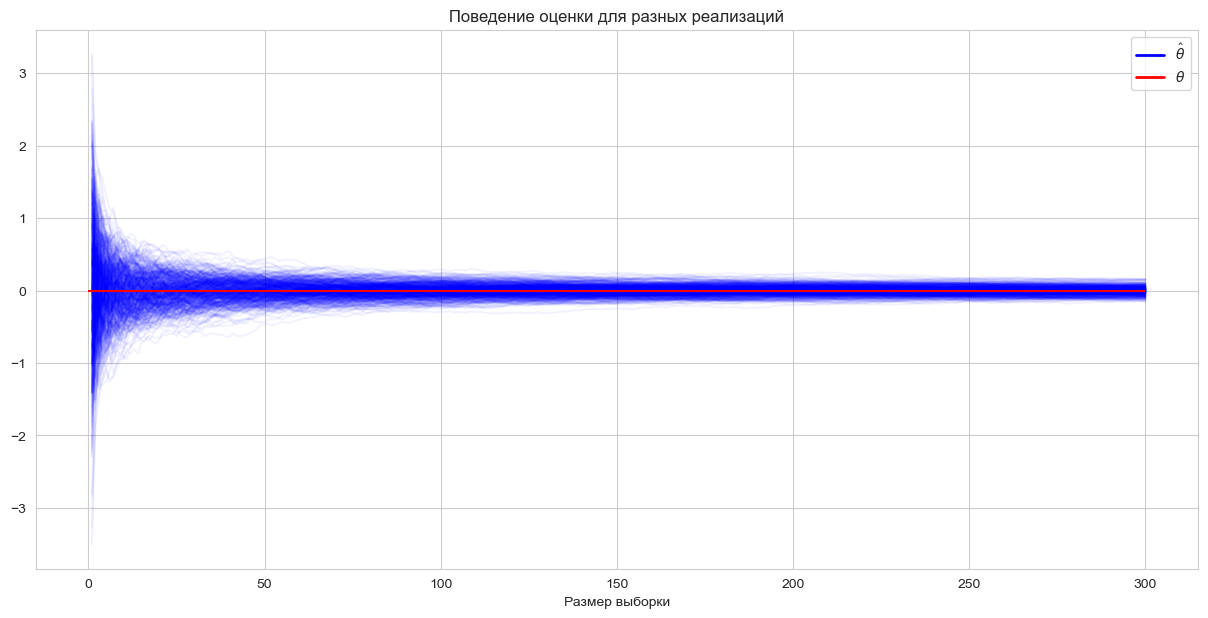

In [85]:
est_plot(estimation, sample_count, sample_size)

Теперь посчитаем границы доверительного интервала. Вам в этом тоже может помочь код из семинара (но на этот раз нигде не используются реальные значения параметров, а только их оценки)

Напоминание из теории:
$$\hat{\theta} - \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}} < \theta < \hat{\theta} + \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}}$$

In [104]:
alpha = 0.95
var = (np.cumsum(X**2, axis=1) - np.cumsum(X, axis=1)**2/n_range)/(n_range-1)
var[:, 0] = np.nan

right = estimation + sps.norm(scale = 1).ppf((1 + alpha)/2) * np.sqrt(var/n_range)
left = estimation - sps.norm(scale = 1).ppf((1 + alpha)/2) * np.sqrt(var/n_range)

C:\Users\maksa\AppData\Local\Temp\ipykernel_11596\328616979.py:2: RuntimeWarning: invalid value encountered in divide
  var = (np.cumsum(X**2, axis=1) - np.cumsum(X, axis=1)**2/n_range)/(n_range-1)


Посчитайте число реализаций доверительных интервалов, в которые попал истинный параметр $\theta$. А тут вам может помочь метод `np.logical_and`

In [105]:
true = np.sum(np.logical_and(theta < right, theta > left), axis=0)

Постройте график зависимости реального уровня доверия от размера выборки.

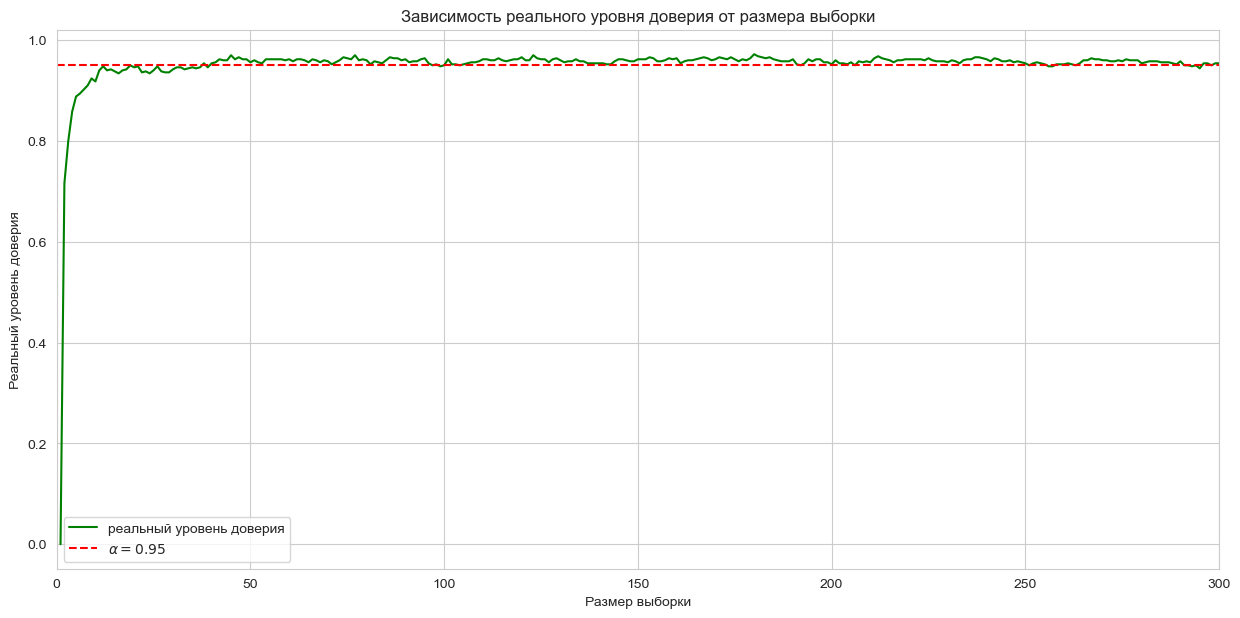

In [106]:
plt.figure(figsize=(15, 7))

plt.plot(n_range, true/sample_count, color='g', label="реальный уровень доверия")
plt.ylabel('Реальный уровень доверия')
plt.xlabel('Размер выборки')
plt.hlines(0.95, 0, sample_size,  color='r', ls='--', label=r"$\alpha = 0.95$")
plt.xlim((0, sample_size))
plt.title("Зависимость реального уровня доверия от размера выборки")
plt.legend()

plt.show()

Сделайте выводы.

**Вывод:** Видим, что при малом размере выборки реальный уровень доверия может быть намного меньше целевого, то есть действительно, что асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки. Однако уже при размере выборки $n \approx 50$ реальный уровень доверия почти совпадает с целевым, и асимптотические доверительные интервалы можно использовать.

## <b><font color="orange">Сложная часть</font></b>

### Задача 6


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения,
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду. Сделайте выводы о сходствах и различиях распределений

**Решение:**

**Вывод:**

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:**

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям.

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

**Вывод:**